<a href="https://colab.research.google.com/github/wkabbani/machine_learning/blob/master/Machine_Learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Basics

We will create an arbitrary function in python and use some random inputs, run the function and get the correspoinding outputs. Then we will use these inputs and outputs as training examples to a create a simple machine learning model that tries to approximate and learn our function.


## Import Dependencies

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.logging.set_verbosity(tf.logging.ERROR)

## 1.The Traditional Approach

In the traditional software development approach, the input and the algorithm is known, and we write a function to produce the output.


### 1.1.The Input


In [13]:
inputs = np.random.randint(1, high=100, size=10)
print(inputs)

[37 89 41 66 24 47 25 74 64 12]


### 1.2. The Algorithm

The algorithm here is just an arbitrary one.
$$ y = 2.5 \times x + 77 $$

In [0]:
def theFunction(x):
  return 2.5 * x + 77;

### 1.3. The Output

In [23]:
outputs = np.fromiter((theFunction(i) for i in inputs), i.dtype)
print(outputs)

[169 299 179 242 137 194 139 262 237 107]


## 2. The Machine Learning Approach

In the machine learning approach, we know the input and the output, but we don't know the algorithm that creates the output given the input.

### 2.1. The Training Examples (Inputs + Outputs)

In [25]:
for i,x in enumerate(inputs):
  print("Input x = {}, Output y = {}".format(x, outputs[i]))

Input x = 37, Output y = 169
Input x = 89, Output y = 299
Input x = 41, Output y = 179
Input x = 66, Output y = 242
Input x = 24, Output y = 137
Input x = 47, Output y = 194
Input x = 25, Output y = 139
Input x = 74, Output y = 262
Input x = 64, Output y = 237
Input x = 12, Output y = 107


### 2.2. The Algorithm

To find out what the algorithm is we need to do a couple of things:
1. Create a model
2. Train the model
3. Use it to predict new values
4. Compare the results with the original function.


### 2.2.1. The First Model

In the first attempt we'll create a very simple one Dense layer with one neuron neural network to try to guess the original function.

In [64]:
# Create the model with just one Dense layer of a single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compile the model to give it the loss function, the optimizer, the learning rate
model.compile(loss='mean_squared_error', 
             optimizer=tf.keras.optimizers.Adam(0.1))

# Train the model
history = model.fit(inputs, outputs, epochs=2500, verbose=False)
print("Training is finished!, and the model is ready!")

Training is finished!, and the model is ready!


In [65]:
# Use the model to predict the output of a new input value
predicted_value = model.predict([100])
print("Predicted value by the model = {}".format(predicted_value))

Predicted value by the model = [[328.8441]]


In [66]:
# Comparing with the original function
correct_value = theFunction(100)
print("The expected value produced by the original function = {}".format(correct_value))
print("The difference = {}".format(np.abs(correct_value - predicted_value)))

The expected value produced by the original function = 327.0
The difference = [[1.8440857]]


We see the difference is not too big between the predicted value and the expected one, but since the training data is limited, we needed a lot of epochs.

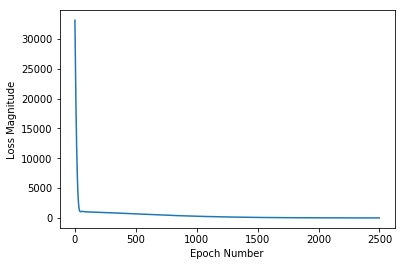

In [67]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

### 2.2.2. The Second Model

In the second attempt we'll create a bit more complex model with three Dense layers and more neurons.

In [70]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=[1]),
    tf.keras.layers.Dense(units=4),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(0.1))

# Train the model
model.fit(inputs, outputs, epochs=2500, verbose=False)
print("Training is finished!, and the model is ready!")

Training is finished!, and the model is ready!


In [71]:
# Use the model to predict the output of a new input value
predicted_value = model.predict([100])
print("Predicted value by the model = {}".format(predicted_value))

Predicted value by the model = [[326.6618]]


In [72]:
# Comparing with the original function
correct_value = theFunction(100)
print("The expected value produced by the original function = {}".format(correct_value))
print("The difference = {}".format(np.abs(correct_value - predicted_value)))

The expected value produced by the original function = 327.0
The difference = [[0.3381958]]


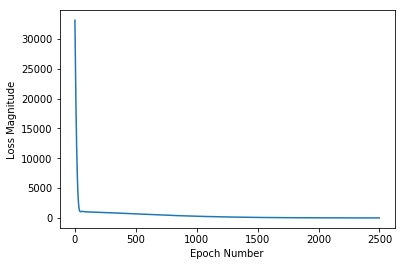

In [73]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])